# Lab 4 - KNN Regression and Evaluation
## lecture 4

In [1]:
install.packages('FNN')

Installing package into 'C:/Users/huntg/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'FNN' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\huntg\AppData\Local\Temp\Rtmp46sEIT\downloaded_packages


# simulation

In [2]:
?runif

Uniform {stats},R Documentation
"x, q",vector of quantiles.
p,vector of probabilities.
n,"number of observations. If length(n) > 1, the length is taken to be the number required."
"min, max",lower and upper limits of the distribution. Must be finite.
"log, log.p","logical; if TRUE, probabilities p are given as log(p)."
lower.tail,"logical; if TRUE (default), probabilities are P[X ≤ x], otherwise, P[X > x]."


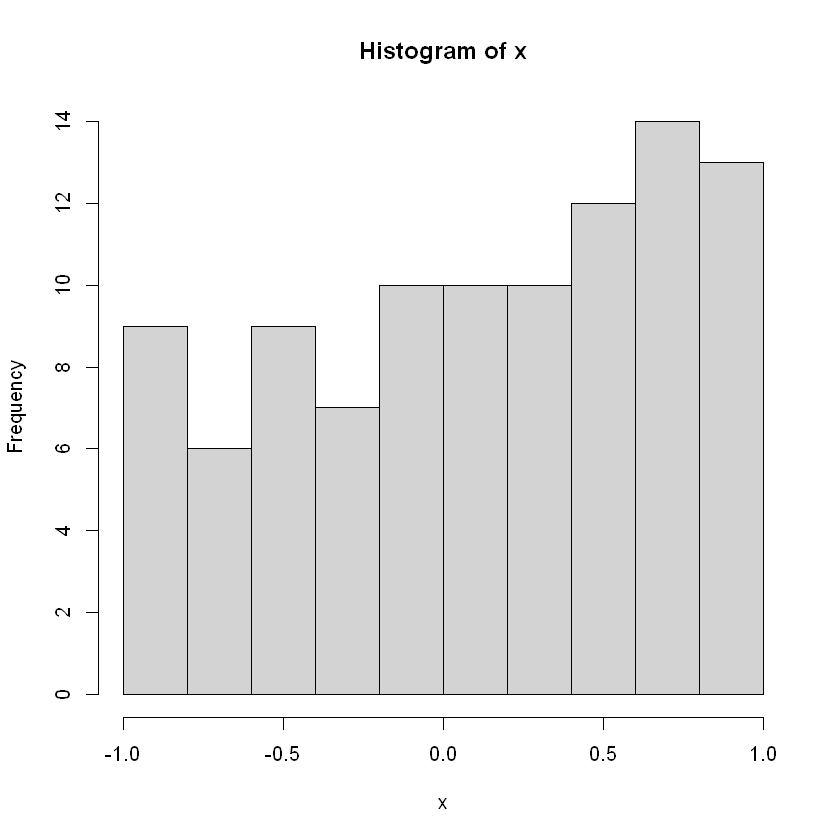

In [7]:
x = runif(100,-1,1)
hist(x)

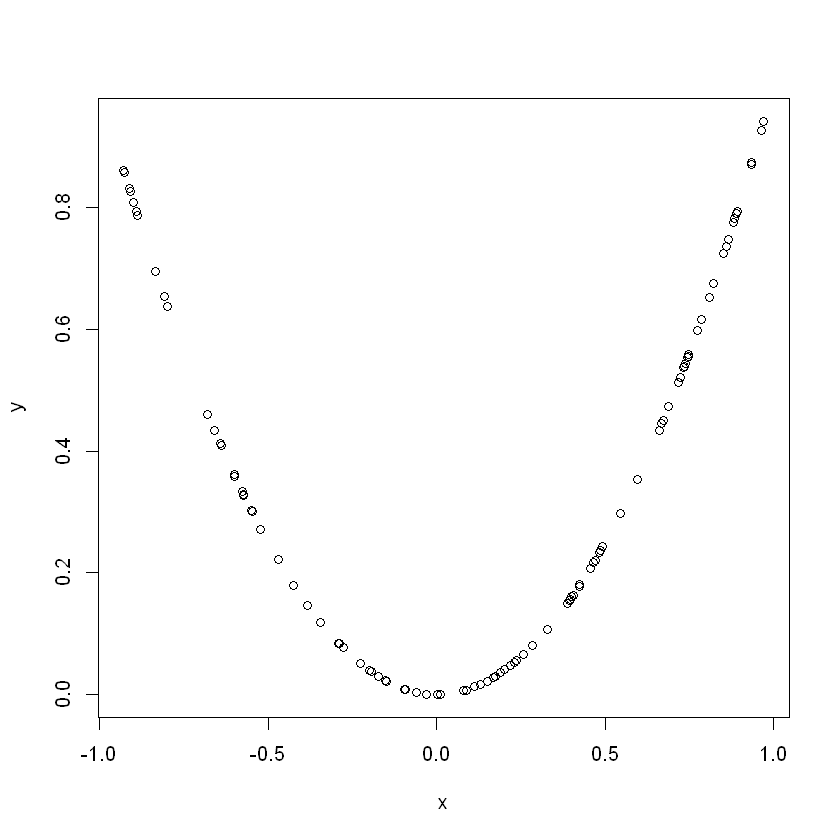

In [8]:
y = x^2 # f(x) = x^2
plot(x,y)

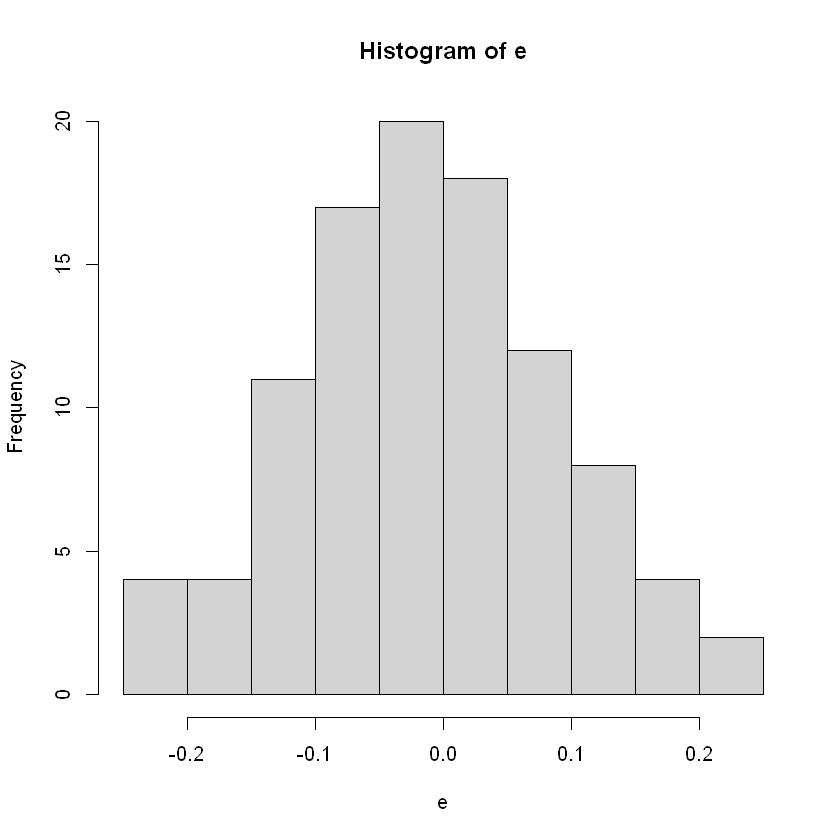

In [11]:
e = rnorm(100,0,1/10)
hist(e)

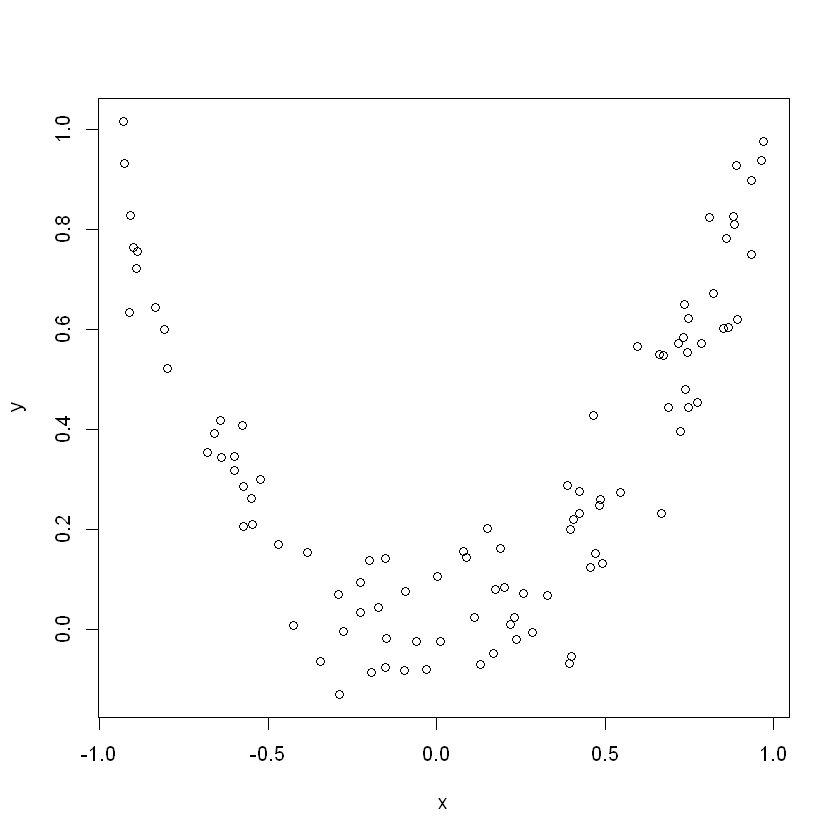

In [12]:
y = x^2 + e
plot(x,y)

# using linear regression

In [13]:
mod = lm(y~x) # y = b0 + b1*x
summary(mod)


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.42814 -0.25656 -0.06458  0.19371  0.78510 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.32142    0.03095  10.384   <2e-16 ***
x            0.09724    0.05258   1.849   0.0674 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3039 on 98 degrees of freedom
Multiple R-squared:  0.03372,	Adjusted R-squared:  0.02386 
F-statistic:  3.42 on 1 and 98 DF,  p-value: 0.06742


[1] 100   2

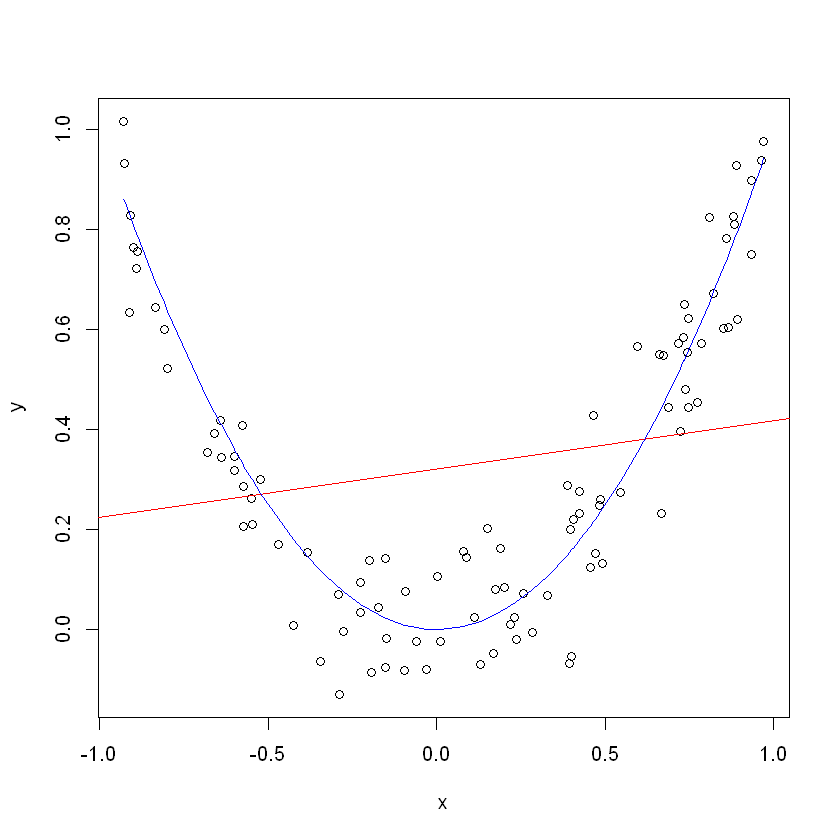

In [63]:
plot(x,y)
abline(coef(mod),col='red')
lines(x[x_ord],x[x_ord]^2,col='blue')
dim(model.matrix(mod))

# KNN

In [16]:
library('FNN')
?knn.reg

knn.reg {FNN},R Documentation
train,matrix or data frame of training set cases.
test,"matrix or data frame of test set cases. A vector will be interpreted as a row vector for a single case. If not supplied, cross-validataion will be done."
y,reponse of each observation in the training set.
k,number of neighbours considered.
algorithm,nearest neighbor search algorithm.
call,the match call.
k,number of neighbours considered.
n,"number of predicted values, either equals test size or train size."
pred,a vector of predicted values.
residuals,predicted residuals. NULL if test is supplied.


In [20]:
X = array(x,c(100,1))
Y = array(y,c(100,1))
knn_mod = knn.reg(train=X,y=Y,test=X,k=10)

In [23]:
names(knn_mod)

[1] "call"      "k"         "n"         "pred"      "residuals" "PRESS"    
[7] "R2Pred"

In [26]:
length(knn_mod$pred) # these are the predictions

[1] 100

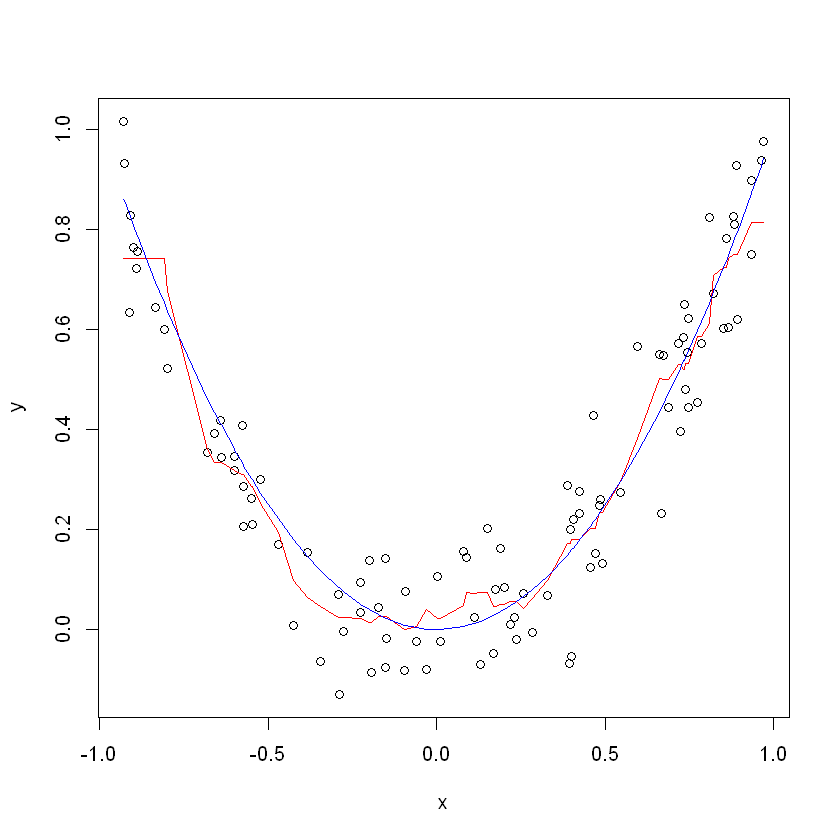

In [45]:
plot(x,y)
x_ord  = order(x)
lines(x[x_ord],knn_mod$pred[x_ord],col='red')
lines(x[x_ord],x[x_ord]^2,col='blue')

## k = 3

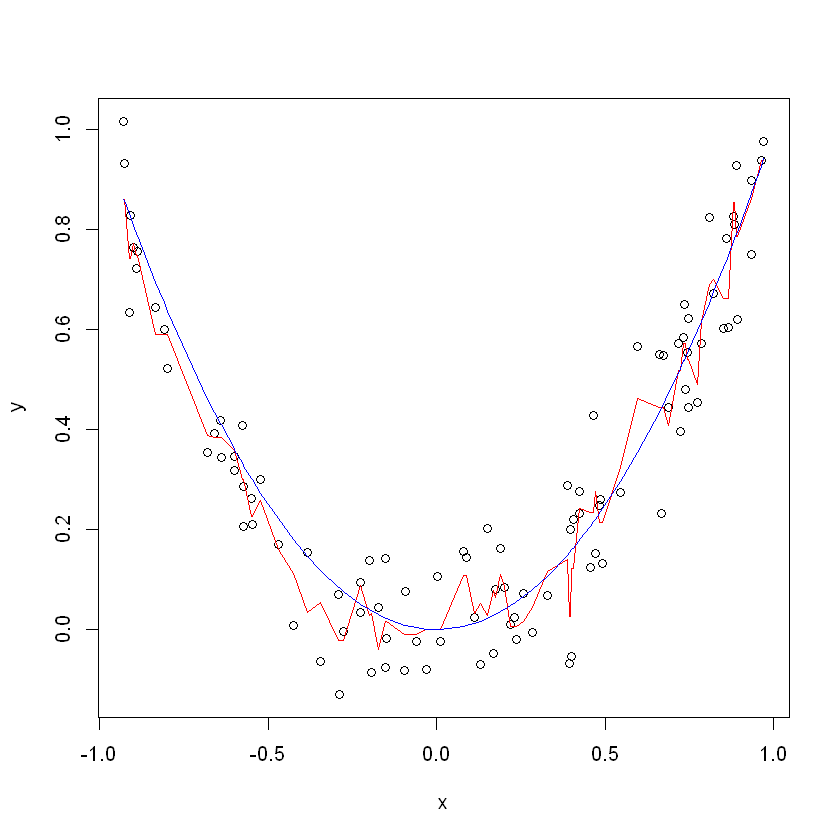

In [48]:
knn_mod = knn.reg(train=X,y=Y,test=X,k=3)
plot(x,y)
lines(x[x_ord],knn_mod$pred[x_ord],col='red')
lines(x[x_ord],x[x_ord]^2,col='blue')

# k = 1

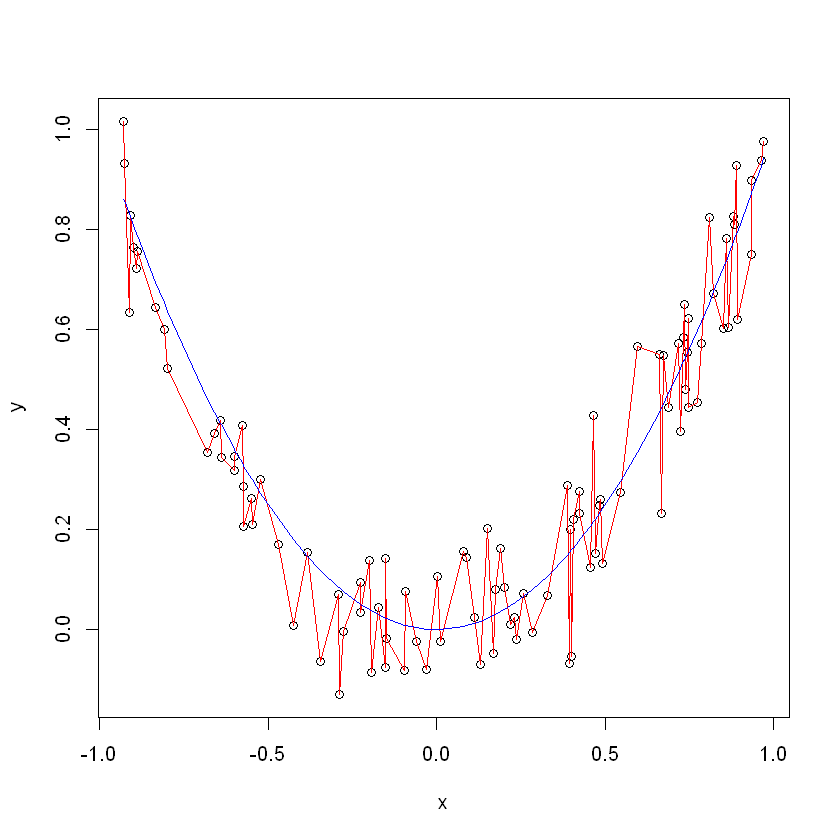

In [50]:
knn_mod = knn.reg(train=X,y=Y,test=X,k=1)
plot(x,y)
lines(x[x_ord],knn_mod$pred[x_ord],col='red')
lines(x[x_ord],x[x_ord]^2,col='blue')

# k = 100

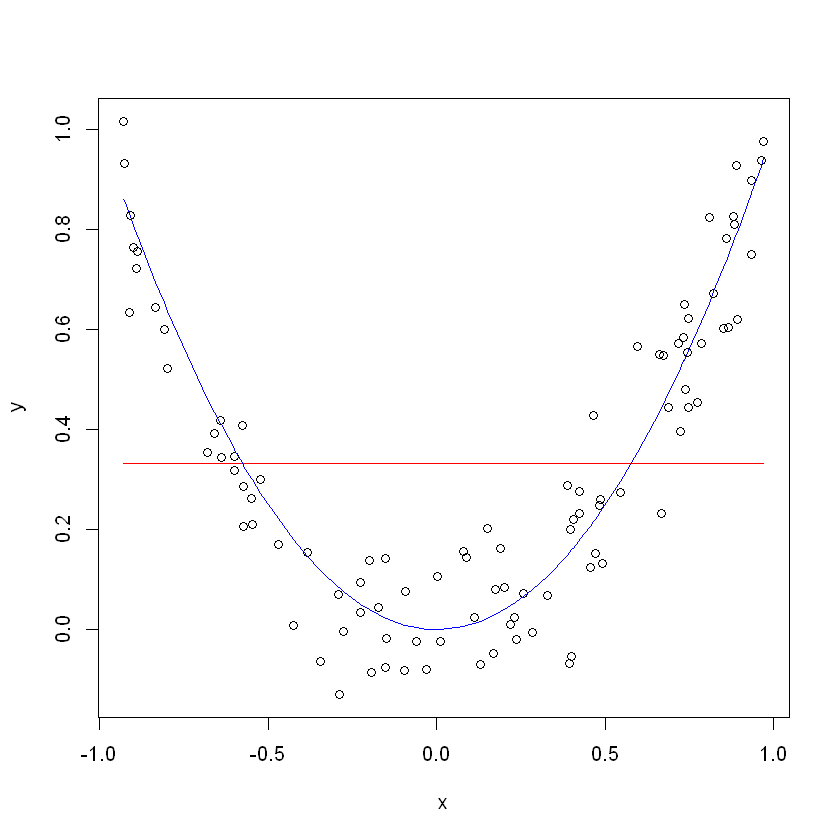

In [51]:
knn_mod = knn.reg(train=X,y=Y,test=X,k=100)
plot(x,y)
lines(x[x_ord],knn_mod$pred[x_ord],col='red')
lines(x[x_ord],x[x_ord]^2,col='blue')

In [52]:
mean(y)

[1] 0.3322682

In [54]:
head(knn_mod$pred)

[1] 0.3322682 0.3322682 0.3322682 0.3322682 0.3322682 0.3322682

# k = 25

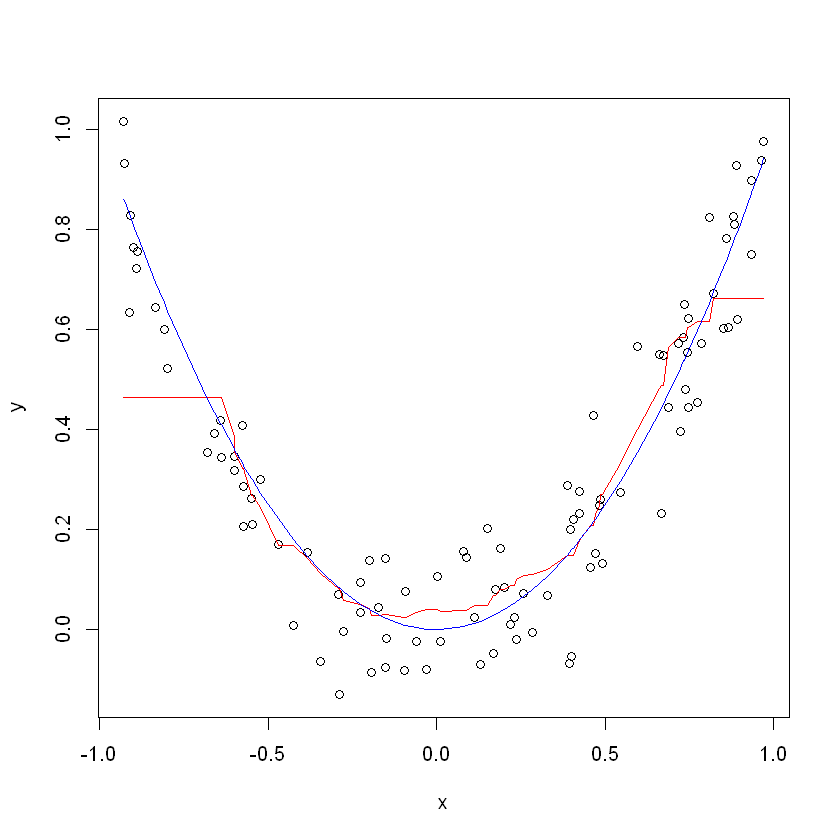

In [57]:
knn_mod = knn.reg(train=X,y=Y,test=X,k=25)
plot(x,y)
lines(x[x_ord],knn_mod$pred[x_ord],col='red')
lines(x[x_ord],x[x_ord]^2,col='blue')

# Can do we do this with a linear model?

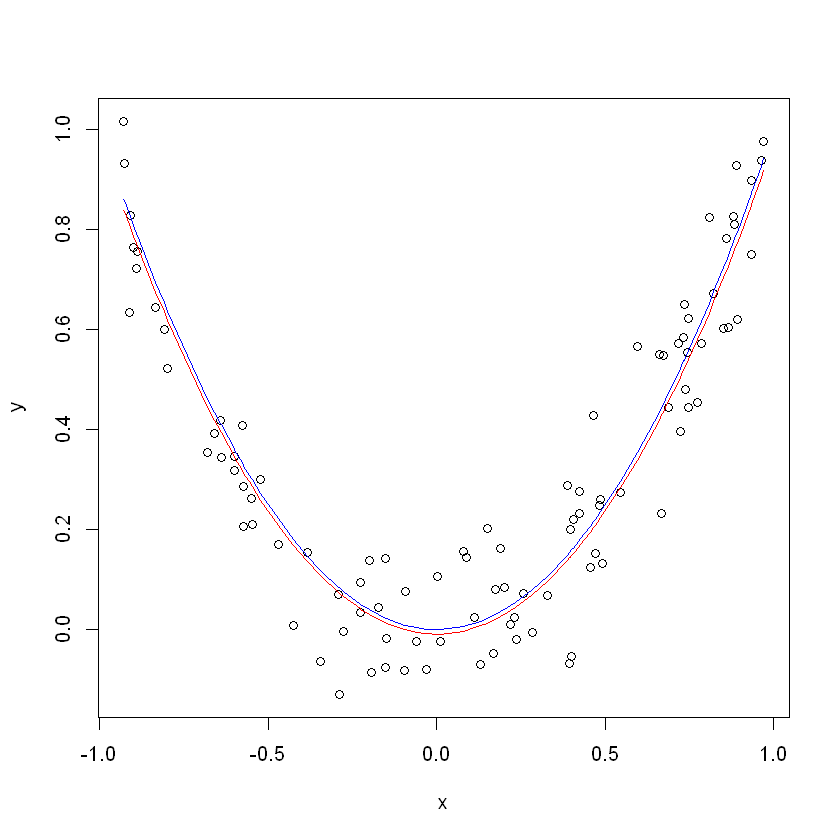

In [59]:
lin_mod = lm(y~I(x^2)) # y = b0+b1x^2
plot(x,y)
lines(x[x_ord],predict(lin_mod)[x_ord],col='red')
lines(x[x_ord],x[x_ord]^2,col='blue')

[1] 100   3

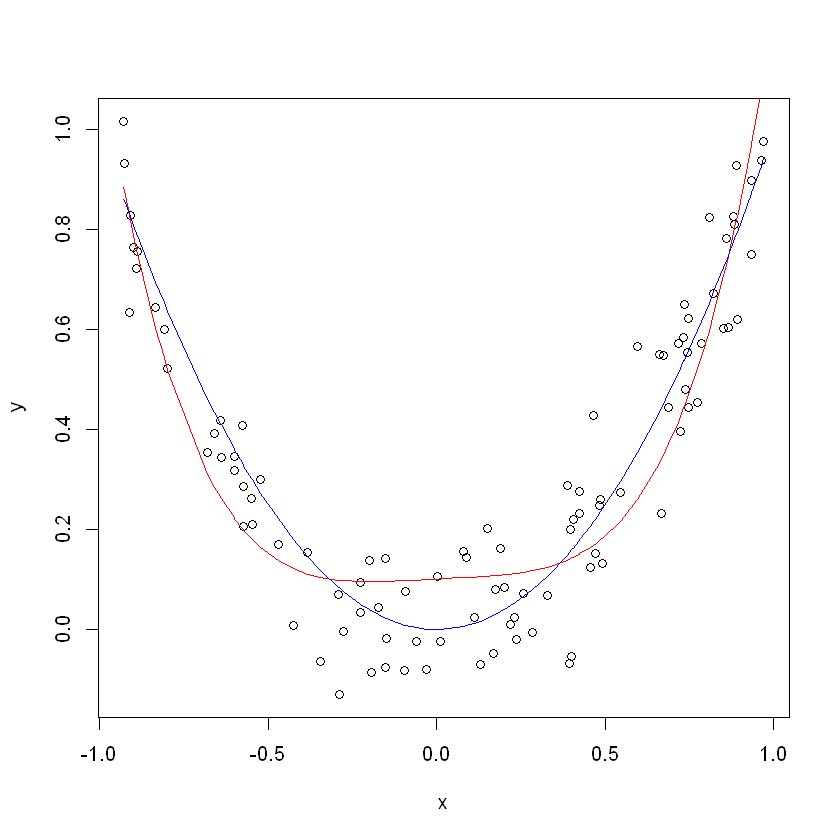

In [62]:
lin_mod = lm(y~x+I(x^4)) # y = b0+b1x^2
plot(x,y)
lines(x[x_ord],predict(lin_mod)[x_ord],col='red')
lines(x[x_ord],x[x_ord]^2,col='blue')
dim(model.matrix(lin_mod))